In [1]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import os

# Loading Model

In [2]:
# Define folder
folder = r"D:\Projects\AIMaster\Neural-Computing-and-Deep-Learning\MNIST_Project"

# Create it if missing
os.makedirs(folder, exist_ok=True)

# load json and create model
json_file = open(os.path.join(folder, "model.json"), 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights(os.path.join(folder, "model.keras"))
print("Loaded model from disk")

Loaded model from disk


# Testing Unseen Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


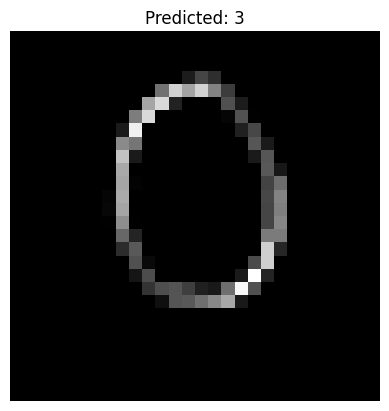

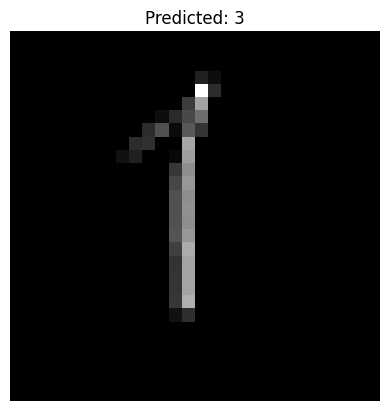

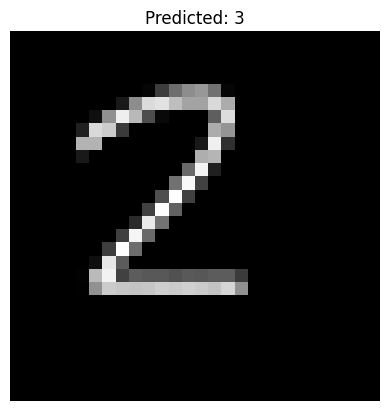

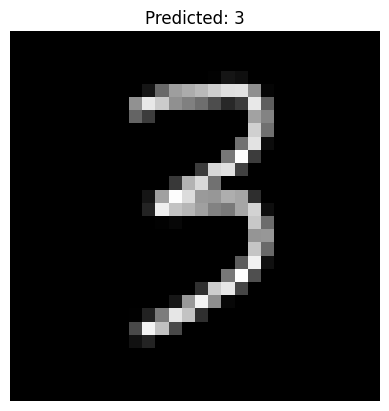

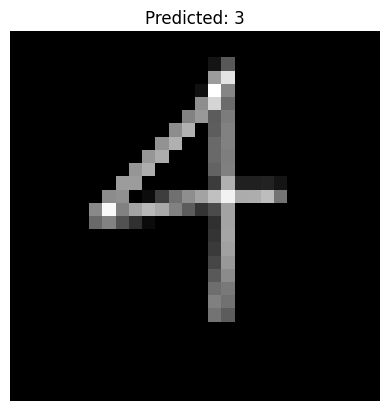

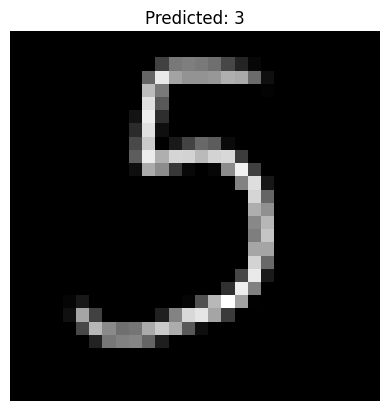

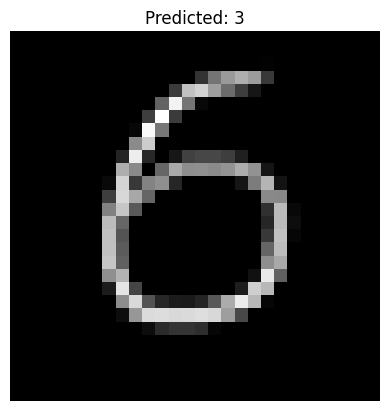

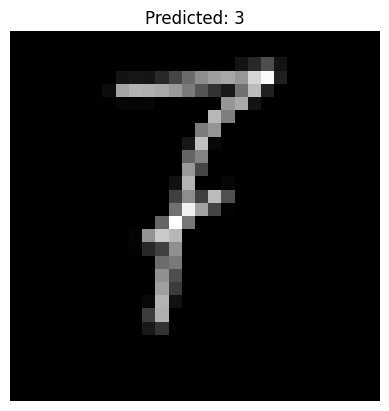

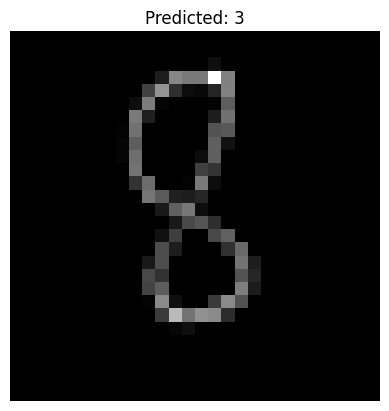

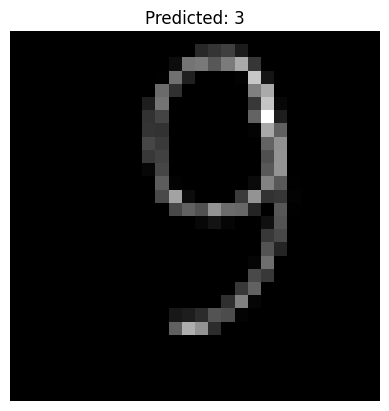

In [4]:
import glob
from PIL import Image

img_folder = r"D:\Projects\AIMaster\Neural-Computing-and-Deep-Learning\MNIST Project\Hand-crafted Num"

# Load and preprocess the 10 images
image_paths = sorted(glob.glob(os.path.join(img_folder, "*.png")))
images = []

for path in image_paths:
    img = Image.open(path).convert("L")   # convert to grayscale
    img = img.resize((28, 28))            # resize to MNIST size
    img = np.array(img) / 255.0           # normalize
    img = 1 - img                         # MNIST digits are white on black
    img = img.reshape(28, 28, 1)             # flatten for MLP input
    images.append(img)


X_new = np.stack(images)

# Predict the classes
preds = loaded_model.predict(X_new)
pred_classes = np.argmax(preds, axis=1)

# Display the images with predicted labels
for i, path in enumerate(image_paths):
    plt.imshow(np.array(Image.open(path).convert("L")), cmap='gray')
    plt.title(f"Predicted: {pred_classes[i]}")
    plt.axis('off')
    plt.show()